In [ ]:
import pandas as pd
resultatsEVOPsimple = pd.read_csv('/results/resultats_EVO_P_PINNS_simple.csv')

In [3]:
# DAdes per valros de theta 0.0

data = {'clima': ['LM', 'LC', 'LS', 'CS', 'CH', 'CSH', 'PLS', 'PLC', 'PLM', 'PPOC', 'PPOR', 'PPC'],
        'theta': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'rmse': [0.2145, 0.157, 0.1933, 0.2773, 0.1406, 0.1669, 0.1457, 0.1872, 0.2141, 0.1737, 0.2547, 0.1373],
        'r2': [0.985, 0.9919, 0.9845, 0.9798, 0.9934, 0.992, 0.9924, 0.9878, 0.986, 0.987, 0.9828, 0.9925],
        'r': [0.9944, 0.9963, 0.9924, 0.9904, 0.9967, 0.996, 0.9967, 0.9947, 0.9935, 0.9942, 0.9916, 0.9965],
        'emissions_kg': [0.000173, 0.000324, 0.000562, 0.000285, 0.000379, 0.000575, 0.00023, 0.000217, 0.000273, 0.000247, 0.000273, 0.000197],
        'temps_s': [26.23, 49.08, 85.24, 43.13, 57.43, 87.15, 34.86, 32.85, 41.34, 37.49, 41.32, 29.78]}
new_data = pd.DataFrame(data)
new_data

,clima,theta,rmse,r2,r,emissions_kg,temps_s
0,LM,0.0,0.2145,0.9850,0.9944,0.000173,26.23
1,LC,0.0,0.1570,0.9919,0.9963,0.000324,49.08
2,LS,0.0,0.1933,0.9845,0.9924,0.000562,85.24
3,CS,0.0,0.2773,0.9798,0.9904,0.000285,43.13
4,CH,0.0,0.1406,0.9934,0.9967,0.000379,57.43
5,CSH,0.0,0.1669,0.9920,0.9960,0.000575,87.15
6,PLS,0.0,0.1457,0.9924,0.9967,0.000230,34.86
7,PLC,0.0,0.1872,0.9878,0.9947,0.000217,32.85
8,PLM,0.0,0.2141,0.9860,0.9935,0.000273,41.34
9,PPOC,0.0,0.1737,0.9870,0.9942,0.000247,37.49


In [4]:
resultatsEVOPsimple = pd.concat([resultatsEVOPsimple, new_data], ignore_index=True)

In [6]:
resultatsEVOPsimple = resultatsEVOPsimple.rename(columns={
    'rmse': 'RMSE',
    'emissions_kg': 'CO2(kg)',
    'temps_s': 'temps(s)'
})

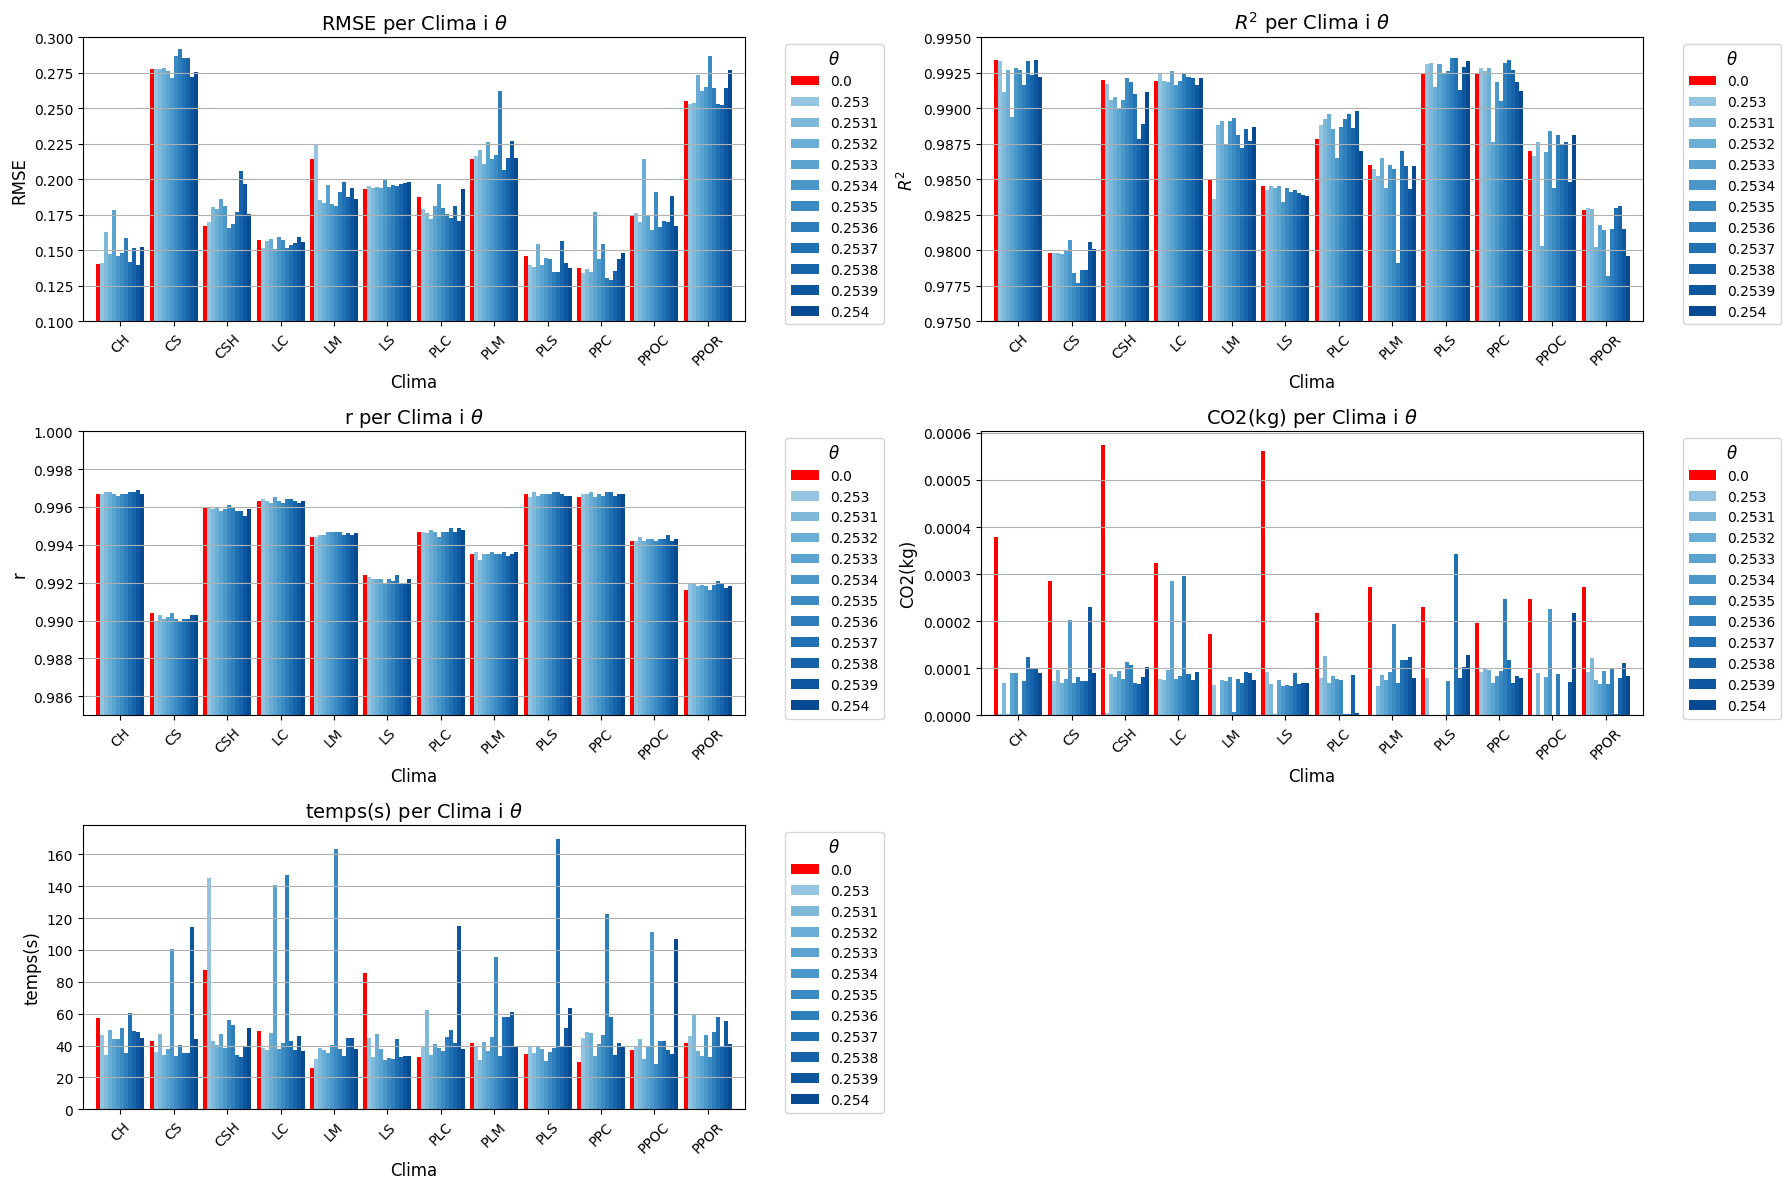

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Llista de paràmetres i límits personalitzats
parametres = ['RMSE', 'r2', 'r', 'CO2(kg)', 'temps(s)']
limits_y = {'RMSE': (0.1, 0.3), 'r2': (0.975, 0.995), 'r': (0.985, 1.0)}

# Colors per cada valor de theta
valors_theta = sorted(resultatsEVOPsimple['theta'].unique())
colors = ['red'] + plt.cm.Blues(np.linspace(0.4, 0.9, len(valors_theta)-1)).tolist()
color_map = dict(zip(valors_theta, colors))

# Configuració del layout
n_cols = 2
n_rows = -(-len(parametres) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Bucle de gràfics
for i, param in enumerate(parametres):
    ax = axes[i]
    resultatsEVOPsimple.groupby(['clima', 'theta'])[param].mean().unstack().plot(
        kind='bar', ax=ax,  width=0.9, color=[color_map[t] for t in valors_theta]
    )

    # Títol i eixos
    y_label = '$R^2$' if param == 'r2' else param
    ax.set_title(f'{y_label} per Clima i $\\theta$', fontsize=14)
    ax.set_xlabel('Clima', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(axis='y')
    ax.tick_params(axis='x', rotation=45)

    # Límits Y si escau
    if param in limits_y:
        ax.set_ylim(limits_y[param])

    # Llegenda amb símbol theta
    ax.legend(title='$\\theta$', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Eliminar subgràfiques buides
for ax in axes[len(parametres):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
resultatsEVOP = pd.read_csv('/results/resultats_EVO_P_PINNS.csv')

resultatsEVOP = resultatsEVOP.rename(columns={
    'rmse': 'RMSE',
    'emissions_kg': 'CO2(kg)',
    'temps_s': 'temps(s)'
})

<ipython-input-10-1d96ce7295d0>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mean, x='theta', y=param,
<ipython-input-10-1d96ce7295d0>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mean, x='theta', y=param,
<ipython-input-10-1d96ce7295d0>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mean, x='theta', y=param,
<ipython-input-10-1d96ce7295d0>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

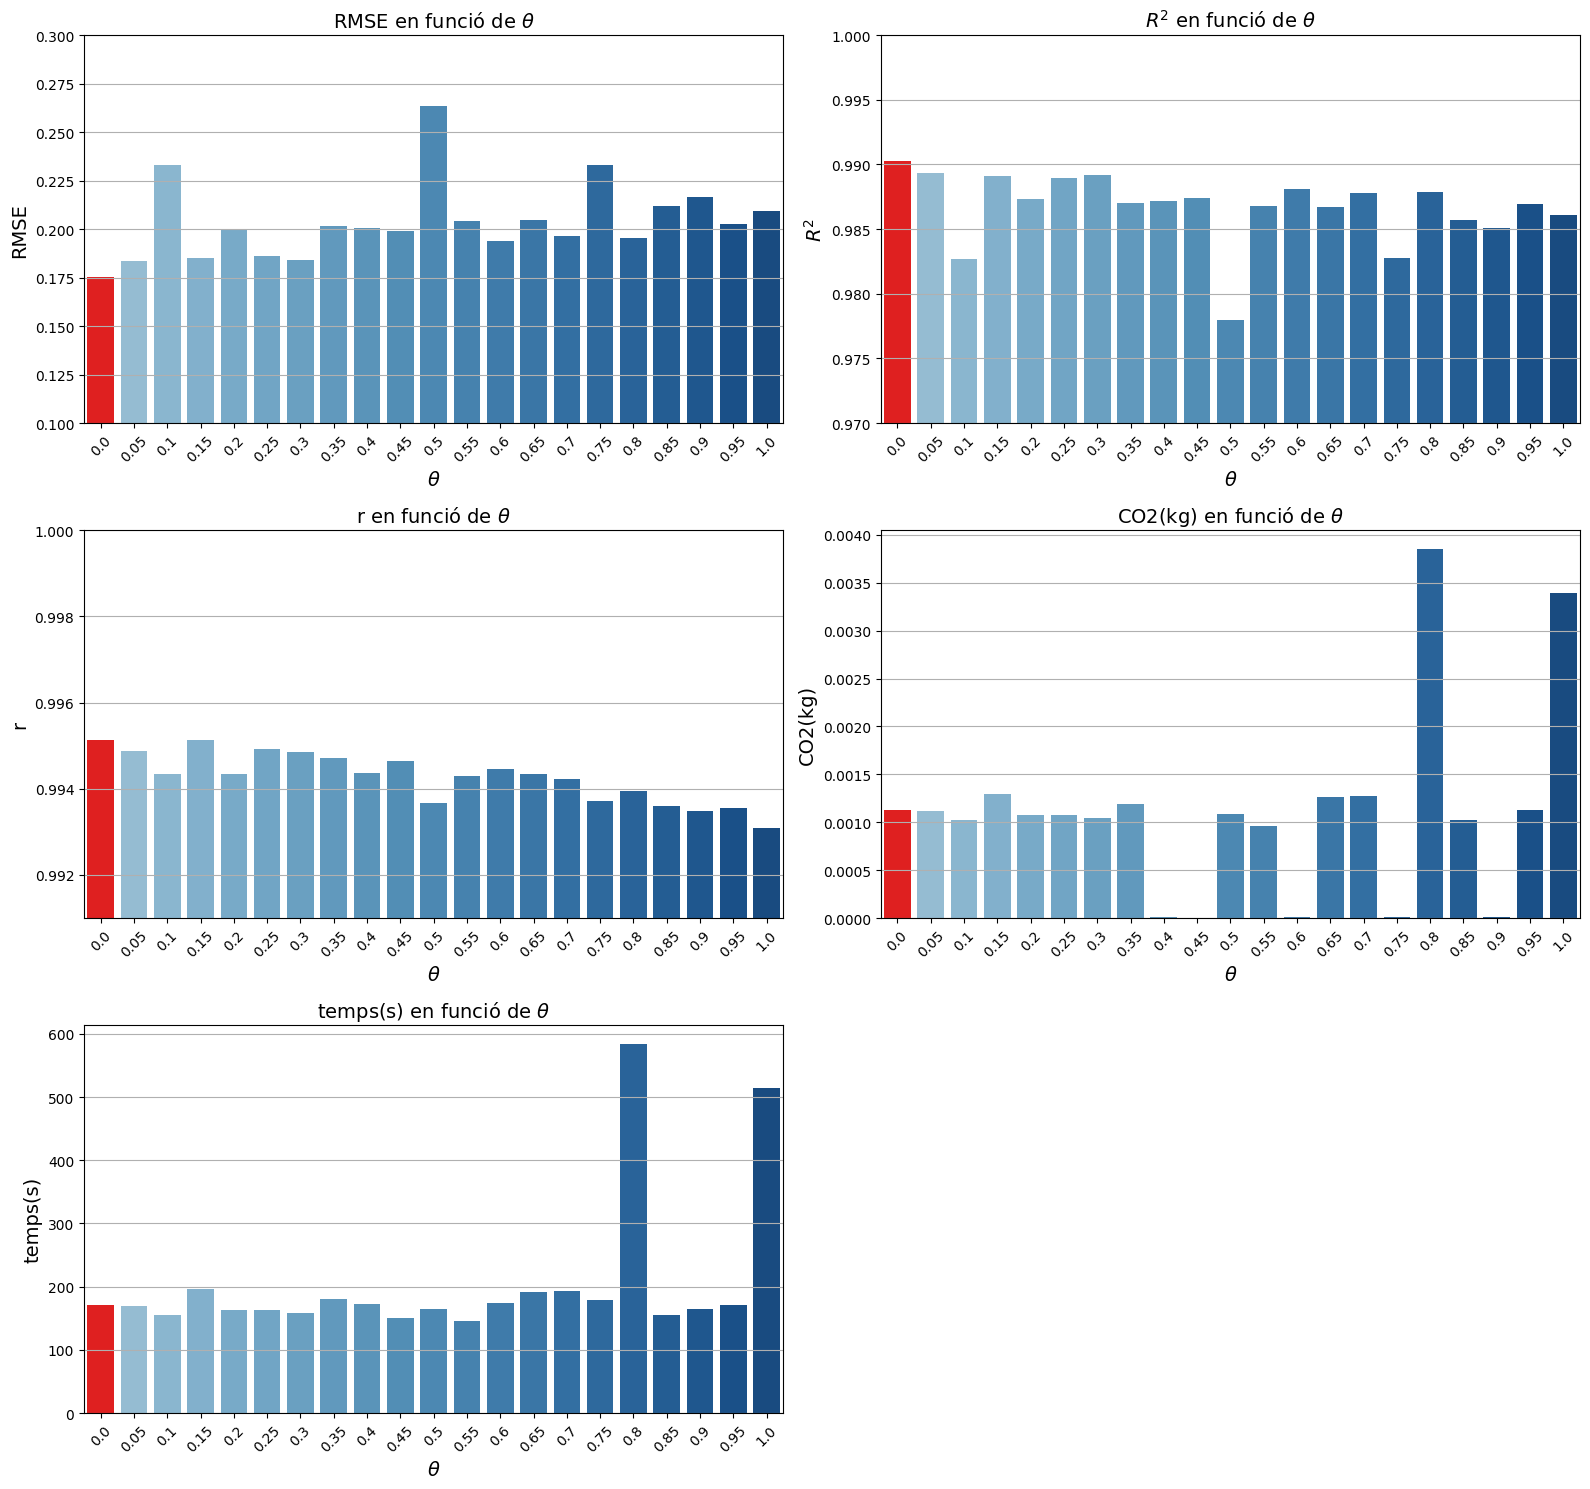

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


resultatsEVOP['theta'] = resultatsEVOP['theta'].round(3)

# Paràmetres i límits personalitzats d’eix Y
parametres = ['RMSE', 'r2', 'r', 'CO2(kg)', 'temps(s)']
limits_y = {
    'RMSE': (0.1, 0.3),
    'r2': (0.97, 1.0),
    'r': (0.991, 1.0),
    'CO2(kg)': None,
    'temps(s)': None
}
theta_symbol = r'$\theta$'

# Preparació de la paleta de colors
valors_theta = sorted(resultatsEVOP['theta'].unique())
colors_blaus = plt.cm.Blues(np.linspace(0.4, 0.9, len(valors_theta))).tolist()
colors = ['red' if t == 0.0 else colors_blaus[i] for i, t in enumerate(valors_theta)]
palette = dict(zip(valors_theta, colors))

# Configuració de subgràfiques
n_cols = 2
n_rows = -(-len(parametres) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

# Bucle per cada paràmetre
for i, param in enumerate(parametres):
    ax = axes[i]
    data_mean = resultatsEVOP.groupby('theta')[param].mean().reset_index()
    sns.barplot(data=data_mean, x='theta', y=param,
                palette=[palette[t] for t in data_mean['theta']], ax=ax)

    y_label = r'$R^2$' if param == 'r2' else param
    ax.set_title(f'{y_label} en funció de {theta_symbol}',fontsize=14)
    ax.set_xlabel(theta_symbol, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.grid(axis='y')
    ax.tick_params(axis='x', rotation=45)

    # Aplicar límit si està definit
    lim = limits_y.get(param)
    if lim:
        ax.set_ylim(lim)

# Eliminar eixos buits
for ax in axes[len(parametres):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
resultatsEVOH = pd.read_csv('/results/resultats_EVO_H_PINN.csv')

resultatsEVOH = resultatsEVOH.rename(columns={
    'rmse': 'RMSE',
    'emissions_kg': 'CO2(kg)',
    'temps_s': 'temps(s)'
})

<ipython-input-13-ea375ad6af2c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mean, x='theta', y=param,
<ipython-input-13-ea375ad6af2c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mean, x='theta', y=param,
<ipython-input-13-ea375ad6af2c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mean, x='theta', y=param,
<ipython-input-13-ea375ad6af2c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

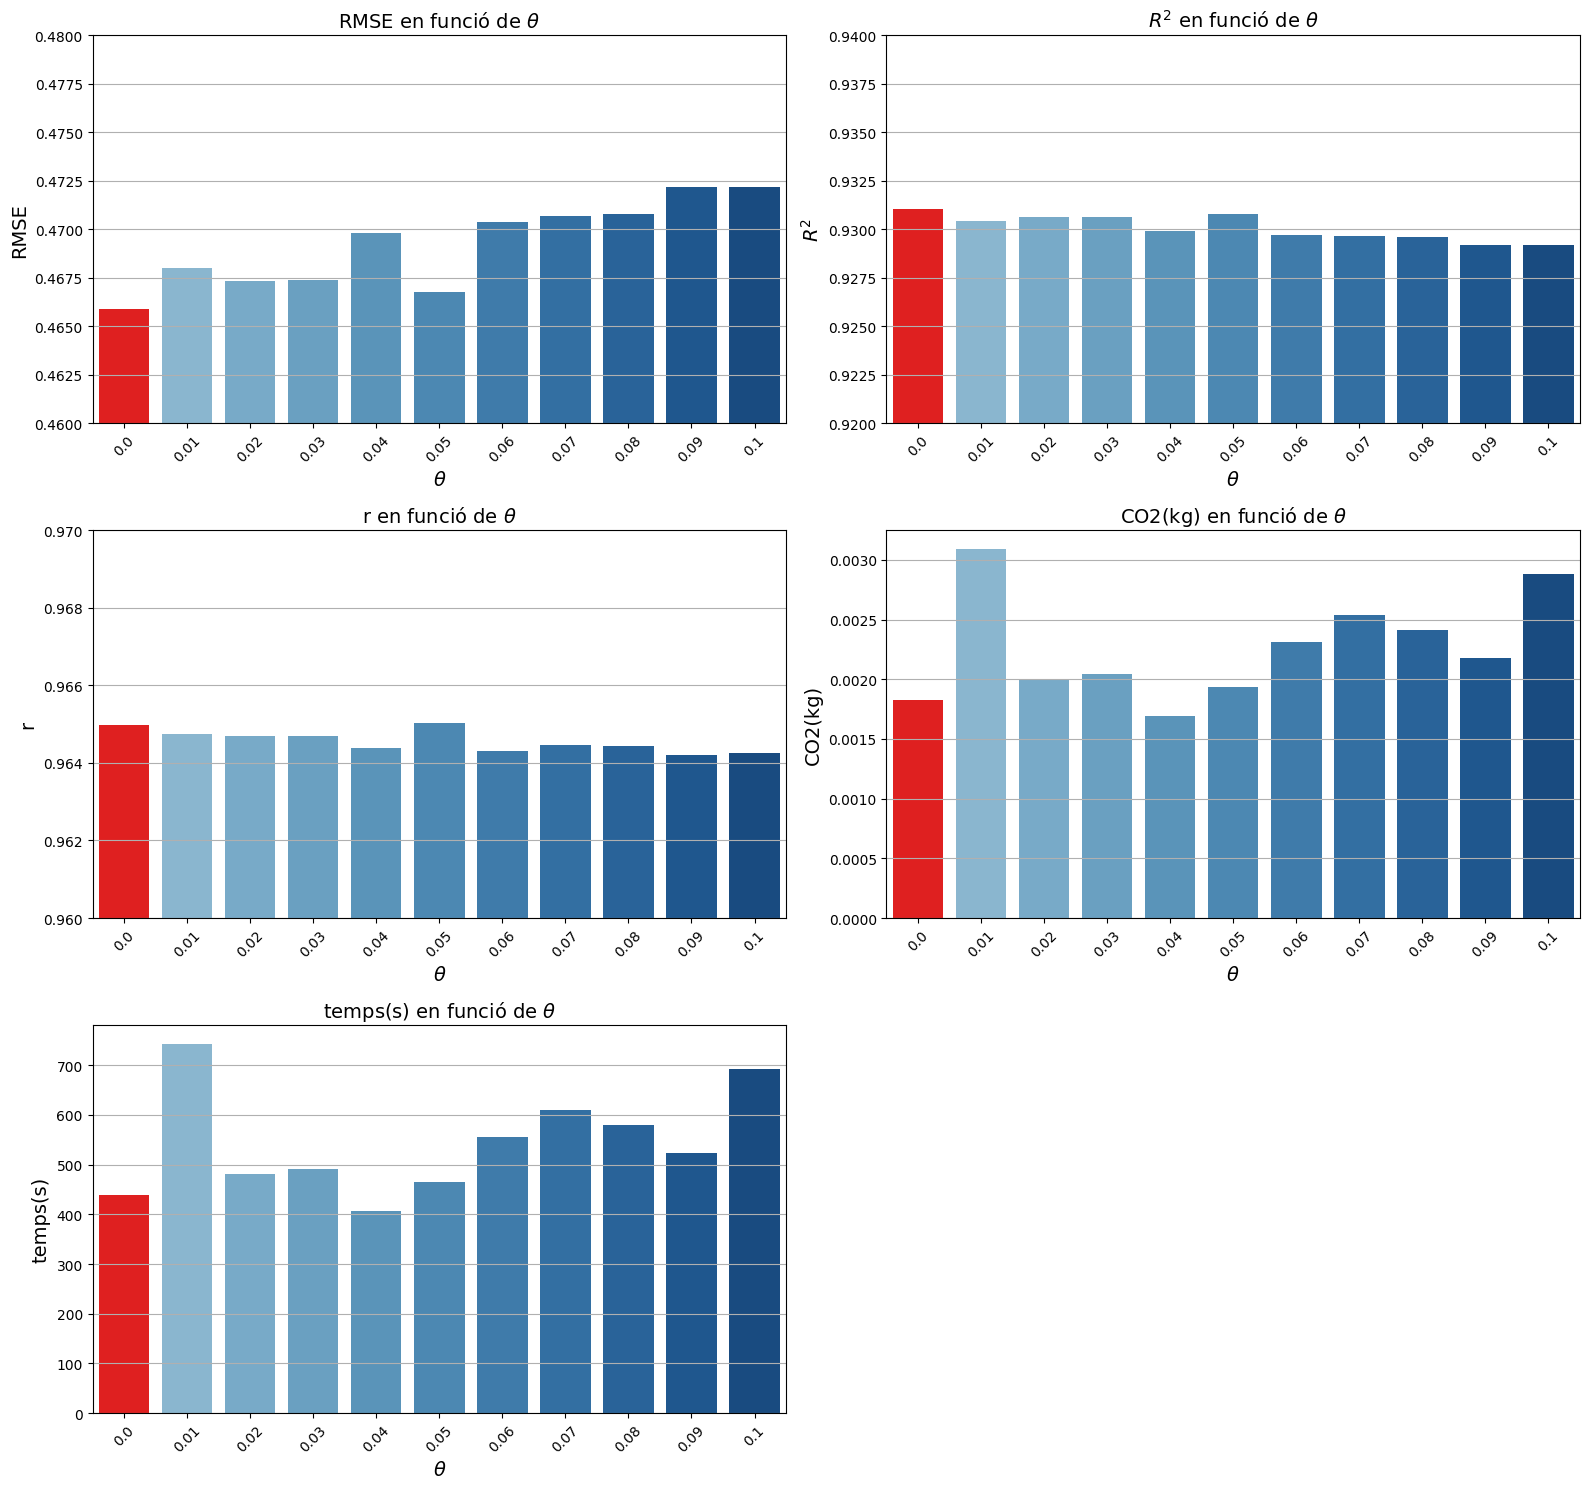

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


resultatsEVOP['theta'] = resultatsEVOP['theta'].round(3)

# Paràmetres i límits personalitzats d’eix Y
parametres = ['RMSE', 'r2', 'r', 'CO2(kg)', 'temps(s)']
limits_y = {
    'RMSE': (0.46, 0.48),
    'r2': (0.92, 0.94),
    'r': (0.96, 0.97),
    'CO2(kg)': None,
    'temps(s)': None
}
theta_symbol = r'$\theta$'

# Preparació de la paleta de colors
valors_theta = sorted(resultatsEVOH['theta'].unique())
colors_blaus = plt.cm.Blues(np.linspace(0.4, 0.9, len(valors_theta))).tolist()
colors = ['red' if t == 0.0 else colors_blaus[i] for i, t in enumerate(valors_theta)]
palette = dict(zip(valors_theta, colors))

# Configuració de subgràfiques
n_cols = 2
n_rows = -(-len(parametres) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

# Bucle per cada paràmetre
for i, param in enumerate(parametres):
    ax = axes[i]
    data_mean = resultatsEVOH.groupby('theta')[param].mean().reset_index()
    sns.barplot(data=data_mean, x='theta', y=param,
                palette=[palette[t] for t in data_mean['theta']], ax=ax)

    y_label = r'$R^2$' if param == 'r2' else param
    ax.set_title(f'{y_label} en funció de {theta_symbol}', fontsize=14)
    ax.set_xlabel(theta_symbol, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.grid(axis='y')
    ax.tick_params(axis='x', rotation=45)

    # Aplicar límit si està definit
    lim = limits_y.get(param)
    if lim:
        ax.set_ylim(lim)

# Eliminar eixos buits
for ax in axes[len(parametres):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
resultatsTVDI = pd.read_csv('/results/resultats_TVDI_PINNS.csv')

<ipython-input-7-3b339f23cd5a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultatsTVDI, x='comb_num', y=param,
<ipython-input-7-3b339f23cd5a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultatsTVDI, x='comb_num', y=param,
<ipython-input-7-3b339f23cd5a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultatsTVDI, x='comb_num', y=param,
<ipython-input-7-3b339f23cd5a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

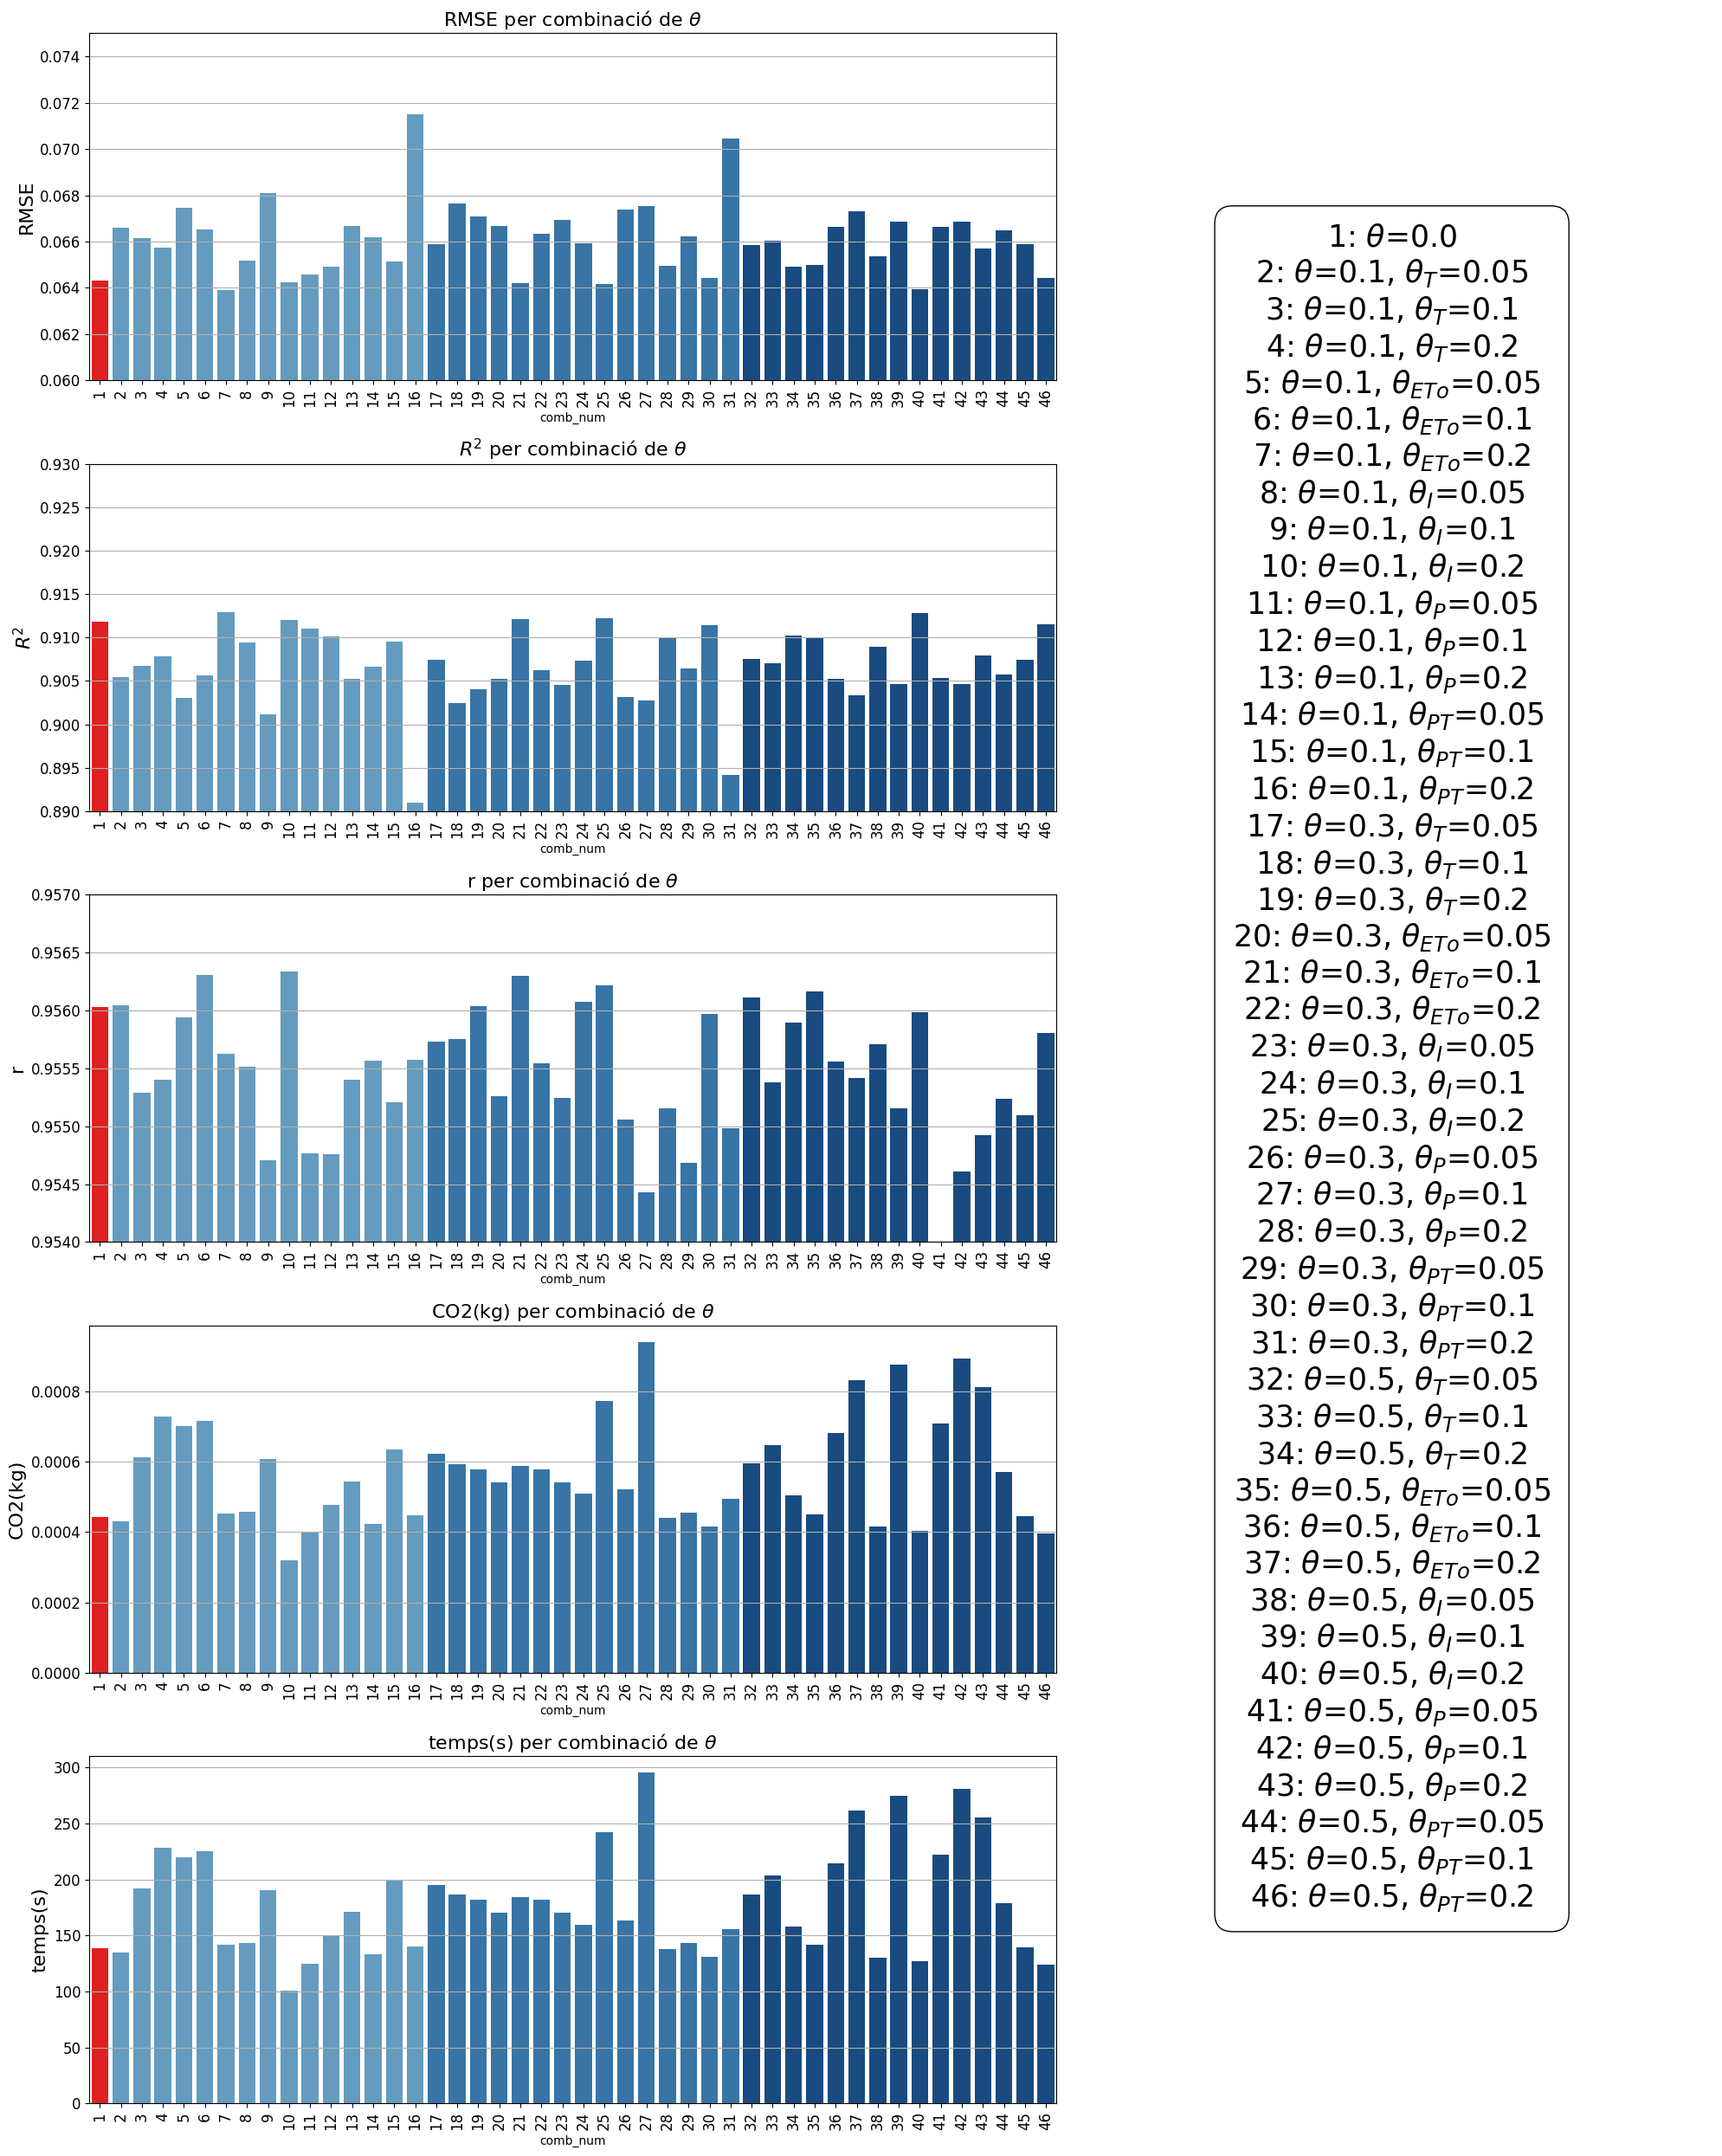

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

resultatsTVDI = resultatsTVDI.rename(columns={
    'rmse': 'RMSE',
    'emissions_kg': 'CO2(kg)',
    'temps_s': 'temps(s)'
})

# Asegurem que existeixi la columna combinació numèrica
resultatsTVDI = resultatsTVDI.copy()
resultatsTVDI['comb_num'] = range(1, len(resultatsTVDI) + 1)

# Columnes i símbols
parametres = ['RMSE', 'r2', 'r', 'CO2(kg)', 'temps(s)']
limits_y = {
    'RMSE': (0.06, 0.075),
    'r2': (0.89, 0.93),
    'r': (0.954, 0.957)
}
theta_symbol = r'$\theta$'


# Colors personalitzats
valors_alpha = sorted(resultatsTVDI['alpha'].unique())
colors_blaus = plt.cm.Blues(np.linspace(0.4, 0.9, len(valors_alpha))).tolist()
colors = ['red' if t == 0.0 else colors_blaus[i] for i, t in enumerate(valors_alpha)]
alpha_palette = dict(zip(valors_alpha, colors))
resultatsTVDI['color'] = resultatsTVDI['alpha'].map(alpha_palette)

# Text per a la llegenda simbòlica
def format_config(row):
    parts = [f"{int(row['comb_num'])}: $\\theta$={row['alpha']}"]
    if row['beta_T'] != 0.0:
        parts.append(f"$\\theta_T$={row['beta_T']}")
    if row['beta_ETo'] != 0.0:
        parts.append(f"$\\theta_{{ETo}}$={row['beta_ETo']}")
    if row['beta_I'] != 0.0:
        parts.append(f"$\\theta_I$={row['beta_I']}")
    if row['beta_p'] != 0.0:
        parts.append(f"$\\theta_P$={row['beta_p']}")
    if row['beta_pt'] != 0.0:
        parts.append(f"$\\theta_{{PT}}$={row['beta_pt']}")
    return ", ".join(parts)

resultatsTVDI['config_text'] = resultatsTVDI.apply(format_config, axis=1)

# FIGURA
fig = plt.figure(figsize=(20, 25))
gs = gridspec.GridSpec(len(parametres), 2, width_ratios=[3, 2])

for i, param in enumerate(parametres):
    ax = plt.subplot(gs[i, 0])
    sns.barplot(data=resultatsTVDI, x='comb_num', y=param,
                palette=resultatsTVDI['color'].tolist(),
                ax=ax)

    y_label = r'$R^2$' if param == 'r2' else param
    ax.set_title(f'{y_label} per combinació de {theta_symbol}', fontsize=16)
    ax.set_xlabel('Combinació', fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_xticks(range(len(resultatsTVDI)))
    ax.set_xticklabels(resultatsTVDI['comb_num'], rotation=90, fontsize=12)
    ax.grid(axis='y')

    if param in limits_y:
        ax.set_ylim(limits_y[param])

    ax.tick_params(axis='y', labelsize=12)

# LLEGENDA SIMBÒLICA A LA DRETA
ax_legenda = plt.subplot(gs[:, 1])
ax_legenda.axis('off')

# Contingut amb caixa (bbox)
table_text = "\n".join(resultatsTVDI['config_text'].values)
ax_legenda.text(0.5, 0.5, table_text,
                fontsize=25,
                ha='center', va='center',
                transform=ax_legenda.transAxes,
                bbox=dict(boxstyle="round,pad=0.6", facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

